# Timing the scalar-vector functions

Use magic command [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) to time `template.scalar_vec_real_XXXXX` functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import template as temp

In [2]:
# create a function that uses numba
@njit
def scalar_vec_real_numba(a, x):
    result = np.empty_like(x)
    for i in range(x.size):
        # the '.real' forces the code to use
        # only the real part of the arrays
        result[i] = a.real*x.real[i]

    return result

In [3]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000, 10000])

In [4]:
for Ni in N:
    print(Ni)

100
300
500
700
1000
10000


In [6]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
for Ni in N:
    scalar = 1
    vector = np.ones(Ni)
    # scalar_vec_real_dumb
    time = %timeit -o -n 100 -r 100 temp.scalar_vec_real(scalar, vector, check_input=False)
    list_time_dumb.append(time.average)
    # scalar_vec_real_numpy
    time = %timeit -o -n 100 -r 100 scalar*vector
    list_time_numpy.append(time.average)
    # scalar_vec_real_numba
    time = %timeit -o -n 100 -r 100 scalar_vec_real_numba(scalar, vector)
    list_time_numba.append(time.average)

12.6 µs ± 3.54 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.03 times longer than the fastest. This could mean that an intermediate result is being cached.
607 ns ± 176 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 5347.31 times longer than the fastest. This could mean that an intermediate result is being cached.
18.1 µs ± 176 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
33.3 µs ± 4.74 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 15.25 times longer than the fastest. This could mean that an intermediate result is being cached.
752 ns ± 852 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
477 ns ± 131 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
50.5 µs ± 3.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
670 ns ± 132 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
384 ns ± 12.7 ns per loop (mean ± std. dev. of 100 runs, 100

In [7]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)

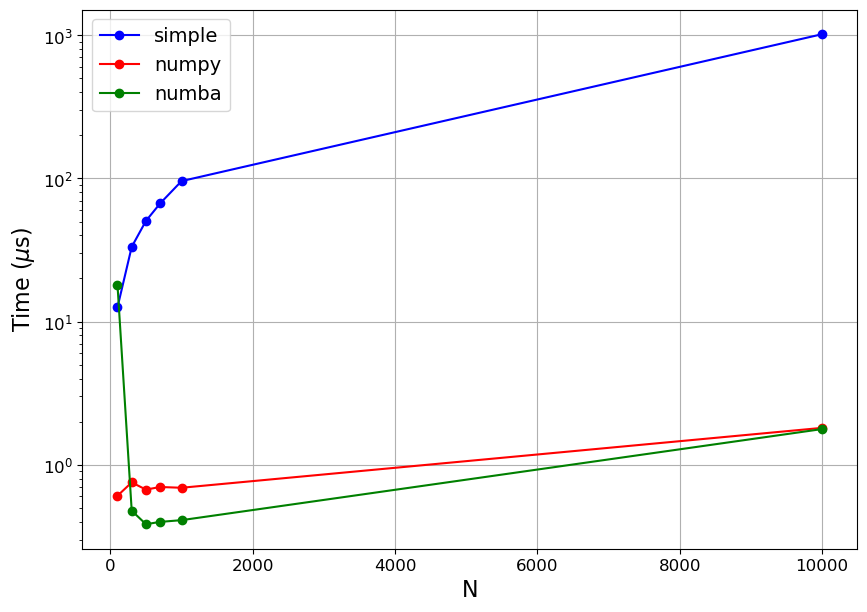

In [8]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_dumb*1e6, 'bo-', label = 'simple')
plt.plot(N, list_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'go-', label = 'numba')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()